In [111]:
import numpy
import matplotlib.pyplot
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
from sklearn import cross_validation
from sklearn import preprocessing
%matplotlib inline
matplotlib.style.use('ggplot')
numpy.set_printoptions(threshold=numpy.nan)

In [112]:
df = pd.read_csv('trainingset_test.csv')

#delete random instances of normal waves to balance the dataset
def balance_class_naive(df,target,num_instances):
    df_target = df[df['classification'] == target]
    df =  df[df['classification'] != target]
    df = df.append(df_target.ix[1:num_instances])
    return df

def balance_class_std(df,target):
    pass
    return df

df = balance_class_naive(df,'(AFIB',10000)
df = balance_class_naive(df,'(SBR',10000)
df = balance_class_naive(df,'(AB',10000)
df = balance_class_naive(df,'(B',10000)
df = balance_class_naive(df,'(N',10000)

#tirando classes que eu nao sei o que sao
df =  df[df['classification'] != '(WPWAF']
df =  df[df['classification'] != '(SVTA']
df =  df[df['classification'] != '(SAB']

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108713 entries, 0 to 10000
Data columns (total 13 columns):
p                    108713 non-null float64
q                    108713 non-null float64
r                    108713 non-null float64
s                    108713 non-null float64
t                    108713 non-null float64
pr_interval_width    108713 non-null float64
pr_segment_width     108713 non-null float64
qrs_complex_width    108713 non-null float64
qt_interval_width    108713 non-null float64
st_segment_width     108713 non-null float64
p_interval_width     108713 non-null float64
t_interval_width     108713 non-null float64
classification       108713 non-null object
dtypes: float64(12), object(1)
memory usage: 11.6+ MB


,p,q,r,s,t,pr_interval_width,pr_segment_width,qrs_complex_width,qt_interval_width,st_segment_width,p_interval_width,t_interval_width,classification
0,-0.070,-0.097,0.662,-0.202,0.637,0.096,0.028,-0.108,0.320,0.124,-0.068,-0.088,(VF
1,0.637,-0.467,-0.475,-0.475,0.631,0.060,-0.008,-0.108,0.240,0.044,-0.068,-0.088,(VF
2,0.388,-0.149,0.631,0.062,0.578,0.144,0.112,-0.108,0.312,0.116,-0.032,-0.088,(VF
3,0.643,-0.636,-0.661,-0.661,0.950,0.076,0.008,-0.108,0.424,0.228,-0.068,-0.088,(VF
4,0.516,-0.097,0.867,-0.185,0.755,0.144,0.112,-0.108,0.316,0.120,-0.032,-0.088,(VF
5,0.478,-0.096,0.755,-0.067,0.520,0.144,0.112,-0.108,0.320,0.124,-0.032,-0.088,(VF
6,0.437,-0.689,-0.696,-0.696,0.850,0.076,0.008,-0.108,0.416,0.220,-0.068,-0.088,(VF
7,0.538,-0.048,0.850,-0.357,0.682,0.144,0.104,-0.108,0.300,0.104,-0.040,-0.088,(VF
8,0.850,-0.420,-0.428,-0.428,0.693,0.060,-0.008,-0.108,0.448,0.252,-0.068,-0.088,(VF
9,0.693,-0.608,-0.613,-0.613,0.961,0.040,-0.028,-0.108,0.452,0.288,-0.068,-0.056,(VF


(T       88156
(N        8720
(PREX     7413
(VT       3177
(AF        604
(VF        589
(B          54
dtype: int64


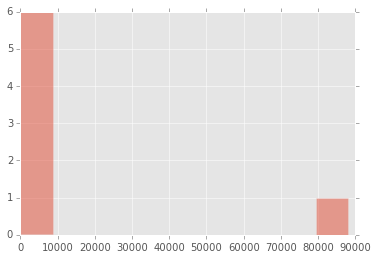

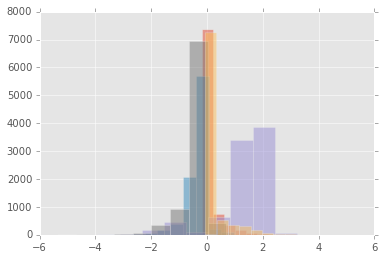

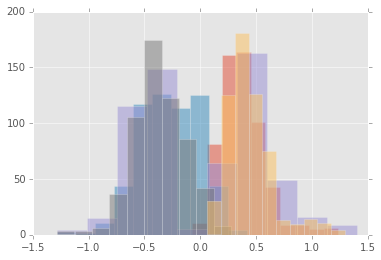

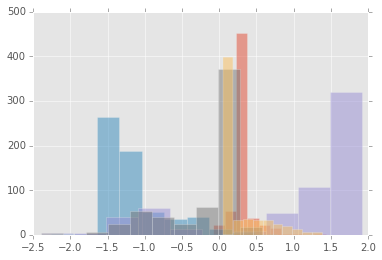

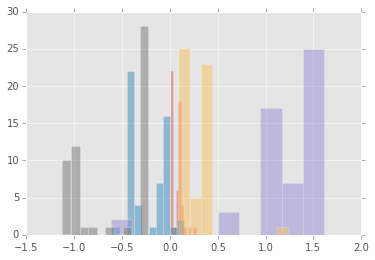

In [113]:
#balanceamento de classes
counts = df['classification'].value_counts()
plt.hist(counts,alpha=0.5)
print counts

plt.figure();
df[df['classification'] == '(N']['p'].hist(alpha=0.5)
df[df['classification'] == '(N']['q'].hist(alpha=0.5)
df[df['classification'] == '(N']['r'].hist(alpha=0.5)
df[df['classification'] == '(N']['s'].hist(alpha=0.5)
df[df['classification'] == '(N']['t'].hist(alpha=0.5)

plt.figure();
df[df['classification'] == '(VF']['p'].hist(alpha=0.5)
df[df['classification'] == '(VF']['q'].hist(alpha=0.5)
df[df['classification'] == '(VF']['r'].hist(alpha=0.5)
df[df['classification'] == '(VF']['s'].hist(alpha=0.5)
df[df['classification'] == '(VF']['t'].hist(alpha=0.5)

plt.figure();
df[df['classification'] == '(AF']['p'].hist(alpha=0.5)
df[df['classification'] == '(AF']['q'].hist(alpha=0.5)
df[df['classification'] == '(AF']['r'].hist(alpha=0.5)
df[df['classification'] == '(AF']['s'].hist(alpha=0.5)
df[df['classification'] == '(AF']['t'].hist(alpha=0.5)

plt.figure();
df[df['classification'] == '(B']['p'].hist(alpha=0.5)
df[df['classification'] == '(B']['q'].hist(alpha=0.5)
df[df['classification'] == '(B']['r'].hist(alpha=0.5)
df[df['classification'] == '(B']['s'].hist(alpha=0.5)
df[df['classification'] == '(B']['t'].hist(alpha=0.5)


In [114]:
#transform classes to numbers
'''
(N       8720
(PREX    7413
(T       6644
(VT      3177
(AF       604
(VF       589
(B         54
'''

le = preprocessing.LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])

df.head(10)


,p,q,r,s,t,pr_interval_width,pr_segment_width,qrs_complex_width,qt_interval_width,st_segment_width,p_interval_width,t_interval_width,classification
0,-0.070,-0.097,0.662,-0.202,0.637,0.096,0.028,-0.108,0.320,0.124,-0.068,-0.088,5
1,0.637,-0.467,-0.475,-0.475,0.631,0.060,-0.008,-0.108,0.240,0.044,-0.068,-0.088,5
2,0.388,-0.149,0.631,0.062,0.578,0.144,0.112,-0.108,0.312,0.116,-0.032,-0.088,5
3,0.643,-0.636,-0.661,-0.661,0.950,0.076,0.008,-0.108,0.424,0.228,-0.068,-0.088,5
4,0.516,-0.097,0.867,-0.185,0.755,0.144,0.112,-0.108,0.316,0.120,-0.032,-0.088,5
5,0.478,-0.096,0.755,-0.067,0.520,0.144,0.112,-0.108,0.320,0.124,-0.032,-0.088,5
6,0.437,-0.689,-0.696,-0.696,0.850,0.076,0.008,-0.108,0.416,0.220,-0.068,-0.088,5
7,0.538,-0.048,0.850,-0.357,0.682,0.144,0.104,-0.108,0.300,0.104,-0.040,-0.088,5
8,0.850,-0.420,-0.428,-0.428,0.693,0.060,-0.008,-0.108,0.448,0.252,-0.068,-0.088,5
9,0.693,-0.608,-0.613,-0.613,0.961,0.040,-0.028,-0.108,0.452,0.288,-0.068,-0.056,5


In [115]:
#transform to numpy array
train, test = train_test_split(df, test_size = 0.33,random_state=2)
train_values = train.values
test_values = test.values


In [125]:
#Random Forest
model_rf = RandomForestClassifier(n_estimators = 100)
model_rf = model_rf.fit(train_values[:,0:5], train_values[:,12])

print 'RANDOM FOREST - FEATURE IMPORTANCE : %s' % model_rf.feature_importances_

predictions_rf = model_rf.predict(test_values[:,0:5])

# Logistic Regression

model_lr = LogisticRegression(C=1000.0,random_state=0)
model_lr = model_lr.fit(train_values[:,0:5], train_values[:,12])

print 'LOGISTIC REGRESSION - COEFFICIENTS : %s' % model_lr.coef_

predictions_lr = model_lr.predict(test_values[:,0:5])

# #KNN
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn = model_knn.fit(train_values[:,0:5], train_values[:,12])

predictions_knn = model_knn.predict(test_values[:,0:5])

#SVM
model_svm = SVC()
model_svm = model_svm.fit(train_values[:,0:5], train_values[:,12])

# print 'SVM - DUAL COEFFICIENTS : %s' % model_svm.dual_coef_
# print 'SVM - SUPPORT VECTORS : %s' % model_svm.support_vectors_
# print 'SVM - NUMBER SV EACH CLASS : %s' % model_svm.n_support_

predictions_svm = model_svm.predict(test_values[:,0:5])


RANDOM FOREST - FEATURE IMPORTANCE : [ 0.19633265  0.13131583  0.33747096  0.12583878  0.20904179]
LOGISTIC REGRESSION - COEFFICIENTS : [[ -7.50905306e-01  -7.88268664e+00  -1.36710306e+00   6.14990354e+00
    5.33193369e-01]
 [ -4.13297146e+00   5.41909882e+00   1.10677889e+00  -1.73105227e+00
    3.95428304e-03]
 [  1.35620676e+01   6.63699512e-01   4.32433139e+00  -7.55006983e-01
    5.12257817e+00]
 [  9.06898586e+00   1.36529249e+01  -6.26734283e+00   1.04111956e+01
   -2.94955458e+00]
 [ -1.29422695e+01   8.02645830e-02  -1.35833673e+00   2.02253624e+00
   -1.71511353e+00]
 [  6.28839505e+00   8.21336569e+00  -6.35783348e+00   5.98986304e+00
    1.22184418e+00]
 [ -1.27388508e+01  -5.99505438e+00  -1.13844309e+00  -2.49702130e+00
   -9.44696737e+00]]


In [117]:
#quality metric

#ACCURACY

print '============= ACCURACY ==============='
print 'RANDOM FOREST - ACCURACY : '+str(model_rf.score(test_values[:,0:5],test_values[:,12]))
print 'LOGISTIC REGRESSION - ACCURACY : '+str(model_lr.score(test_values[:,0:5],test_values[:,12]))
print 'KNN - ACCURACY : '+str(model_knn.score(test_values[:,0:5],test_values[:,12]))
print 'SVM - ACCURACY : '+str(model_svm.score(test_values[:,0:5],test_values[:,12]))

#F1 SCORE
'''
'binary':
Only report results for the class specified by pos_label.
This is applicable only if targets (y_{true,pred}) are binary.

'micro':
Calculate metrics globally by counting the total true positives, 
false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. 
This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average, weighted by support 
(the number of true instances for each label). This alters ‘macro’ to account for label 
imbalance; it can result in an F-score that is not between precision and recall.

'samples':
Calculate metrics for each instance, and find their average 
(only meaningful for multilabel classification where this differs from accuracy_score).

'''
print '============= F1 SCORE ==============='
print 'RANDOM FOREST - F1 MACRO: %f' % f1_score(test_values[:,12], predictions_rf, average='macro')
print 'RANDOM FOREST - F1 MICRO: %f' % f1_score(test_values[:,12], predictions_rf, average='micro')
print 'RANDOM FOREST - F1 WEIGHTED: %f' % f1_score(test_values[:,12], predictions_rf, average='weighted')

print 'LOGISTIC REGRESSION - F1 MACRO: %f' % f1_score(test_values[:,12], predictions_lr, average='macro')
print 'LOGISTIC REGRESSION - F1 MICRO: %f' % f1_score(test_values[:,12], predictions_lr, average='micro')
print 'LOGISTIC REGRESSION - F1 WEIGHTED: %f' % f1_score(test_values[:,12], predictions_lr, average='weighted')

print 'KNN - F1 MACRO: %f' % f1_score(test_values[:,12], predictions_knn, average='macro')
print 'KNN - F1 MICRO: %f' % f1_score(test_values[:,12], predictions_knn, average='micro')
print 'KNN - F1 WEIGHTED: %f' % f1_score(test_values[:,12], predictions_knn, average='weighted')

print 'SVM - F1 MACRO: %f' % f1_score(test_values[:,12], predictions_svm, average='macro')
print 'SVM - F1 MICRO: %f' % f1_score(test_values[:,12], predictions_svm, average='micro')
print 'SVM - F1 WEIGHTED: %f' % f1_score(test_values[:,12], predictions_svm, average='weighted')

#CROSS VALIDATION
print '============= CROSS VALIDATION ==============='
scores = cross_validation.cross_val_score(model_rf, test_values[:,0:5],test_values[:,12], cv=10)
print("RANDOM FOREST - CROSS VALIDATION: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_validation.cross_val_score(model_lr, test_values[:,0:5],test_values[:,12], cv=10)
print("LOGISTIC REGRESSION - CROSS VALIDATION: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_validation.cross_val_score(model_knn, test_values[:,0:5],test_values[:,12], cv=10)
print("KNN - CROSS VALIDATION: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_validation.cross_val_score(model_svm, test_values[:,0:5],test_values[:,12], cv=10)
print("SVM - CROSS VALIDATION: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

============= ACCURACY ===============
RANDOM FOREST - ACCURACY : 0.93558367711
LOGISTIC REGRESSION - ACCURACY : 0.874567956294
KNN - ACCURACY : 0.951861969004
SVM - ACCURACY : 0.938259560709
============= F1 SCORE ===============
RANDOM FOREST - F1 MACRO: 0.702721
RANDOM FOREST - F1 MICRO: 0.935584
RANDOM FOREST - F1 WEIGHTED: 0.932952
LOGISTIC REGRESSION - F1 MACRO: 0.389365
LOGISTIC REGRESSION - F1 MICRO: 0.874568
LOGISTIC REGRESSION - F1 WEIGHTED: 0.843616
KNN - F1 MACRO: 0.728323
KNN - F1 MICRO: 0.951862
KNN - F1 WEIGHTED: 0.943004
SVM - F1 MACRO: 0.592982
SVM - F1 MICRO: 0.938260
SVM - F1 WEIGHTED: 0.923873
============= CROSS VALIDATION ===============
RANDOM FOREST - CROSS VALIDATION: 0.94 (+/- 0.01)
LOGISTIC REGRESSION - CROSS VALIDATION: 0.87 (+/- 0.01)
KNN - CROSS VALIDATION: 0.95 (+/- 0.00)
SVM - CROSS VALIDATION: 0.93 (+/- 0.01)
